PHILIPPINE K-12 ENROLLMENT FORECASTING ANALYSIS
FIXED VERSION - Data Leakage Prevention

[STEP 1/9] Loading dataset...
   ✓ Dataset loaded: 561 rows × 33 columns
   ✓ Columns: ['item_no', 'sector', 'Academic_Year', 'AY_Start', 'AY_End', 'Region', 'Kindergarten', 'Grade 1', 'Grade 2', 'Grade 3']... (showing first 10)

   Preview:
   item_no  sector Academic_Year  AY_Start  AY_End  \
0        1  Public  SY 2010-2011      2010    2011   
1        2  Public  SY 2010-2011      2010    2011   
2        3  Public  SY 2010-2011      2010    2011   

                       Region  Kindergarten  Grade 1  Grade 2  Grade 3  ...  \
0    Region I - Ilocos Region         84553   120004   106298   101393  ...   
1  Region II - Cagayan Valley         27079    83959    73674    70180  ...   
2  Region III - Central Luzon        141901   258235   221107   210823  ...   

   Grade 11 SPORTS  Grade 11 A&D  Grade 12 ABM  Grade 12 HUMSS  Grade 12 STEM  \
0                0             0             0        

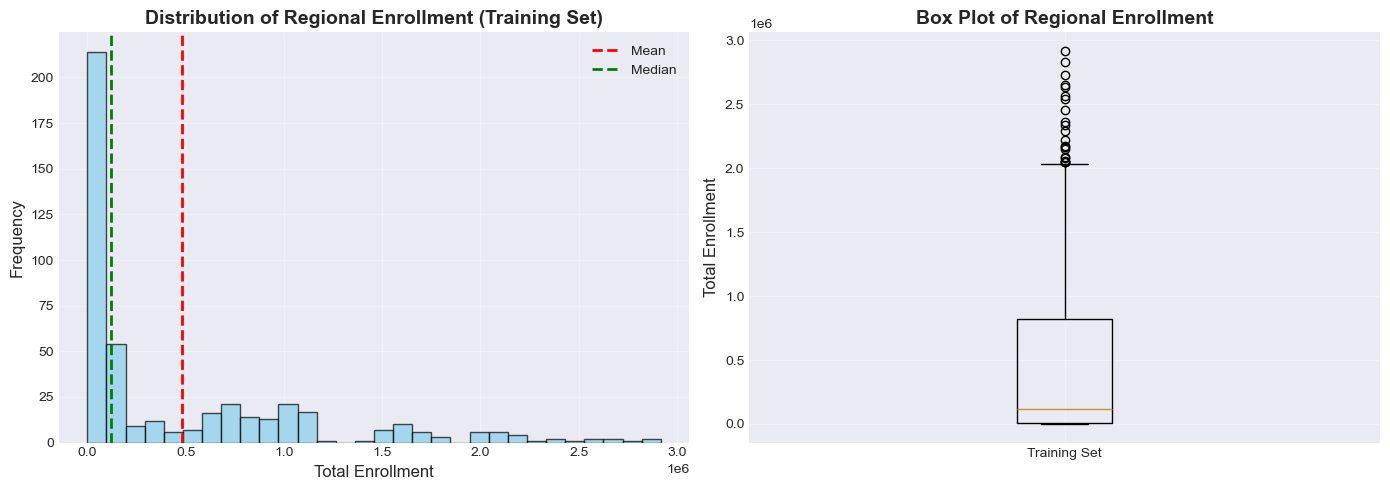


DATA PREPROCESSING COMPLETE - LEAKAGE-FREE

MODEL TRAINING AND EVALUATION

TRAINING: Linear Regression
   • Fitting model...
   ✓ Training complete

   PERFORMANCE METRICS:
   ├─ R² (Training):    0.8456
   ├─ R² (Testing):     0.8362
   ├─ Overfit Gap:      0.0094
   ├─ MAE (Train):      196,030.32 students
   ├─ MAE (Test):       196,320.79 students
   ├─ RMSE (Test):      284,212.39 students
   └─ MAPE (Test):      2038.43%

   ✓ GOOD: Model explains 83.62% of variance

   PRACTICAL INTERPRETATION:
   Average enrollment: 520,536 students
   Typical error: ±196,321 students (37.72% of average)

TRAINING: Decision Tree
   • Fitting model...
   ✓ Training complete

   PERFORMANCE METRICS:
   ├─ R² (Training):    0.9930
   ├─ R² (Testing):     0.9867
   ├─ Overfit Gap:      0.0063
   ├─ MAE (Train):      26,435.23 students
   ├─ MAE (Test):       46,444.54 students
   ├─ RMSE (Test):      80,905.23 students
   └─ MAPE (Test):      28.38%

   ✓ EXCELLENT: Model explains 98.67% of varian

In [10]:
# ============================================
# PHILIPPINE K-12 ENROLLMENT FORECASTING
# Complete Analysis Pipeline - FIXED VERSION
# Authors: Nice Bulio & Mc Sergel Cardano
# Data Leakage Prevention Applied
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*60)
print("PHILIPPINE K-12 ENROLLMENT FORECASTING ANALYSIS")
print("FIXED VERSION - Data Leakage Prevention")
print("="*60)

# ============================================
# STEP 1: DATA LOADING
# ============================================

print("\n[STEP 1/9] Loading dataset...")

# Load the dataset
df = pd.read_csv('philippines_enrollment.csv')

print(f"   ✓ Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"   ✓ Columns: {list(df.columns[:10])}... (showing first 10)")

# Display first few rows
print("\n   Preview:")
print(df.head(3))

# Store original dataframe for volatility analysis later
df_original = df.copy()

# ============================================
# STEP 2: GRADE-LEVEL AGGREGATION
# ============================================

print("\n[STEP 2/9] Aggregating grade-level enrollment...")

# Identify all enrollment columns (K-12)
grade_cols = [col for col in df.columns if any(x in col.lower() for x in 
              ['kindergarten', 'grade', 'strand', 'abm', 'humss', 'stem', 
               'gas', 'maritime', 'tvl', 'sports', 'a&d'])]

print(f"   ✓ Found {len(grade_cols)} enrollment columns")
print(f"   Examples: {grade_cols[:5]}")

# Create target variable: Total Regional Enrollment
df['Total_Enrollment'] = df[grade_cols].sum(axis=1)

print(f"   ✓ Target variable created: Total_Enrollment")
print(f"   ✓ Range: {df['Total_Enrollment'].min():,.0f} to {df['Total_Enrollment'].max():,.0f}")
print(f"   ✓ Mean: {df['Total_Enrollment'].mean():,.0f} students")
print(f"   ✓ Std Dev: {df['Total_Enrollment'].std():,.0f} students")

# ============================================
# STEP 3: FEATURE SELECTION (PREVENT LEAKAGE)
# ============================================

print("\n[STEP 3/9] Selecting features (preventing data leakage)...")

# Define which columns to use as features
# CRITICAL: Exclude grade-level columns to prevent leakage
feature_columns = []

# Add categorical features
if 'Region' in df.columns:
    feature_columns.append('Region')
if 'sector' in df.columns:
    feature_columns.append('sector')
if 'Academic_Year' in df.columns:
    feature_columns.append('Academic_Year')

# Add year-related features if available
year_related_cols = ['AY_Start', 'AY_End']
for col in year_related_cols:
    if col in df.columns:
        feature_columns.append(col)

print(f"   ✓ Features to be used: {feature_columns}")

# Create feature dataframe
df_features = df[feature_columns + ['Total_Enrollment']].copy()

print(f"\n   Data Leakage Prevention:")
print(f"   ✓ Excluded {len(grade_cols)} grade-level columns (would leak target)")
print(f"   ✓ Using only: Region, Sector, Year information")
print(f"   ✓ This ensures model predicts FUTURE enrollment from regional patterns")

# ============================================
# STEP 4: CATEGORICAL ENCODING
# ============================================

print("\n[STEP 4/9] Encoding categorical variables...")

# Identify categorical columns
categorical_cols = [col for col in feature_columns if col in df_features.columns 
                   and df_features[col].dtype == 'object']

print(f"   ✓ Categorical columns found: {categorical_cols}")

# One-hot encode
df_encoded = pd.get_dummies(df_features, columns=categorical_cols, drop_first=False)

print(f"   ✓ Before encoding: {len(df_features.columns)} columns")
print(f"   ✓ After encoding: {len(df_encoded.columns)} columns")
print(f"   ✓ New features created: {len(df_encoded.columns) - len(df_features.columns)}")

# ============================================
# STEP 5: DATA CLEANING
# ============================================

print("\n[STEP 5/9] Cleaning data...")

# Check missing values
missing_before = df_encoded.isnull().sum().sum()
print(f"   • Missing values found: {missing_before}")

# Handle missing values in numeric columns
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns
df_encoded[numeric_cols] = df_encoded[numeric_cols].fillna(df_encoded[numeric_cols].median())

# Drop rows where target is null
df_encoded = df_encoded.dropna(subset=['Total_Enrollment'])

missing_after = df_encoded.isnull().sum().sum()
print(f"   ✓ Missing values after cleaning: {missing_after}")
print(f"   ✓ Final dataset shape: {df_encoded.shape}")

# Outlier detection using IQR
Q1 = df_encoded['Total_Enrollment'].quantile(0.25)
Q3 = df_encoded['Total_Enrollment'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_encoded[(df_encoded['Total_Enrollment'] < lower_bound) | 
                      (df_encoded['Total_Enrollment'] > upper_bound)]

print(f"   • Potential outliers detected: {len(outliers)} ({len(outliers)/len(df_encoded)*100:.1f}%)")
print(f"   ✓ Outliers retained (represent genuine regional volatility)")

# ============================================
# STEP 6: PREPARE FEATURES AND TARGET
# ============================================

print("\n[STEP 6/9] Preparing features and target...")

# CRITICAL: Remove target from features
X = df_encoded.drop(['Total_Enrollment'], axis=1)
y = df_encoded['Total_Enrollment']

print(f"   ✓ Features (X): {X.shape}")
print(f"   ✓ Target (y): {y.shape}")

# Save feature names for later
feature_names = X.columns.tolist()

print(f"\n   Feature Summary:")
print(f"   Total features: {len(feature_names)}")

# Count feature types
region_features = [f for f in feature_names if 'Region' in f]
sector_features = [f for f in feature_names if 'sector' in f]
year_features = [f for f in feature_names if 'Academic_Year' in f or 'AY_' in f]

print(f"   • Region features: {len(region_features)}")
print(f"   • Sector features: {len(sector_features)}")
print(f"   • Year features: {len(year_features)}")
print(f"   • Other features: {len(feature_names) - len(region_features) - len(sector_features) - len(year_features)}")

# ============================================
# STEP 7: CRITICAL DATA LEAKAGE CHECK
# ============================================

print("\n[STEP 7/9] Performing data leakage checks...")

leakage_found = False

# Check 1: Ensure no grade columns in features
grade_in_features = [f for f in feature_names if any(g in f.lower() for g in 
                     ['kindergarten', 'grade_1', 'grade_2', 'grade_3', 'grade_4', 
                      'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 
                      'grade_10', 'grade_11', 'grade_12', 'strand'])]

if len(grade_in_features) > 0:
    print(f"   ❌ LEAKAGE DETECTED: {len(grade_in_features)} grade columns in features!")
    print(f"      {grade_in_features[:5]}...")
    leakage_found = True
    # Remove them
    X = X.drop(columns=grade_in_features)
    print(f"   ✓ Removed grade columns from features")
else:
    print(f"   ✓ No grade-level columns in features")

# Check 2: Feature-target correlation
print(f"\n   Checking for suspiciously high correlations...")
correlations = X.corrwith(y).abs().sort_values(ascending=False)
high_corr = correlations[correlations > 0.95]

if len(high_corr) > 0:
    print(f"   ⚠️  WARNING: {len(high_corr)} features with correlation > 0.95:")
    for feat, corr in high_corr.head(5).items():
        print(f"      • {feat}: {corr:.4f}")
    leakage_found = True
else:
    print(f"   ✓ No features with suspiciously high correlation (>0.95)")

# Check 3: Ensure target not in features
if 'Total_Enrollment' in X.columns:
    print(f"   ❌ CRITICAL: Target variable in features!")
    X = X.drop('Total_Enrollment', axis=1)
    leakage_found = True
else:
    print(f"   ✓ Target variable not in features")

if not leakage_found:
    print(f"\n   ✅ ALL CHECKS PASSED - No data leakage detected")
else:
    print(f"\n   ⚠️  Data leakage issues found and corrected")

# ============================================
# STEP 8: TRAIN-TEST SPLIT (Walk-Forward)
# ============================================

print("\n[STEP 8/9] Creating train-test split (walk-forward)...")

# Identify year columns for temporal split
year_cols = [col for col in X.columns if 'Academic_Year' in col]

if len(year_cols) > 0:
    print(f"   Found {len(year_cols)} year columns for temporal split")
    
    # Extract years from column names
    train_years = list(range(2010, 2020))  # 2010-2019
    test_years = [2020, 2021]  # 2020-2021
    
    # Create masks for train/test based on year columns
    train_mask = pd.Series([False] * len(X), index=X.index)
    test_mask = pd.Series([False] * len(X), index=X.index)
    
    for year in train_years:
        year_col = [col for col in year_cols if str(year) in col]
        if year_col and year_col[0] in X.columns:
            train_mask = train_mask | (X[year_col[0]] == 1)
    
    for year in test_years:
        year_col = [col for col in year_cols if str(year) in col]
        if year_col and year_col[0] in X.columns:
            test_mask = test_mask | (X[year_col[0]] == 1)
    
    X_train = X[train_mask]
    X_test = X[test_mask]
    y_train = y[train_mask]
    y_test = y[test_mask]
    
    print(f"   ✓ Walk-forward split completed:")
    print(f"      Training: 2010-2019 ({len(X_train)} samples, {len(X_train)/len(X)*100:.1f}%)")
    print(f"      Testing: 2020-2021 ({len(X_test)} samples, {len(X_test)/len(X)*100:.1f}%)")
    
    # Verify no overlap
    overlap = set(X_train.index) & set(X_test.index)
    if len(overlap) > 0:
        print(f"   ⚠️  WARNING: {len(overlap)} overlapping indices!")
    else:
        print(f"   ✓ No index overlap between train and test")
        
else:
    # Fallback to standard split if year columns not found
    print("   ⚠️  Year columns not found, using standard 80-20 split")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, shuffle=True
    )
    print(f"   ✓ Standard split: {len(X_train)} train, {len(X_test)} test")

# ============================================
# STEP 9: EXPLORATORY DATA ANALYSIS
# ============================================

print("\n[STEP 9/9] Performing exploratory data analysis...")

# Basic statistics
print("\n   Target Variable Statistics (Training Set):")
print(f"   Mean: {y_train.mean():,.0f} students")
print(f"   Std Dev: {y_train.std():,.0f} students")
print(f"   CV: {(y_train.std()/y_train.mean()*100):.2f}%")
print(f"   Min: {y_train.min():,.0f} students")
print(f"   Max: {y_train.max():,.0f} students")
print(f"   Median: {y_train.median():,.0f} students")

# Visualize distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(y_train, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(y_train.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].axvline(y_train.median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0].set_xlabel('Total Enrollment', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Regional Enrollment (Training Set)', 
                  fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot([y_train], labels=['Training Set'])
axes[1].set_ylabel('Total Enrollment', fontsize=12)
axes[1].set_title('Box Plot of Regional Enrollment', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('01_enrollment_distribution.png', dpi=300, bbox_inches='tight')
print("\n   ✓ Saved: 01_enrollment_distribution.png")
plt.show()

print("\n"+"="*60)
print("DATA PREPROCESSING COMPLETE - LEAKAGE-FREE")
print("="*60)

# ============================================
# MODEL TRAINING WITH DIAGNOSTICS
# ============================================

print("\n"+"="*60)
print("MODEL TRAINING AND EVALUATION")
print("="*60)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(
        max_depth=10, 
        min_samples_split=5,
        random_state=42
    ),
    'Random Forest': RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    ),
    'Support Vector Regression': SVR(
        kernel='rbf',
        C=1000,
        epsilon=0.1
    )
}

# Store results
results = {}
predictions = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"TRAINING: {name}")
    print(f"{'='*60}")
    
    # Train
    print("   • Fitting model...")
    model.fit(X_train, y_train)
    print("   ✓ Training complete")
    
    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Evaluate
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    # Calculate MAPE
    mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
    
    # Store results
    results[name] = {
        'model': model,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'mae_train': mae_train,
        'mae_test': mae_test,
        'rmse': rmse_test,
        'mape': mape_test,
        'y_pred': y_pred_test
    }
    
    predictions[name] = y_pred_test
    
    # Calculate overfitting gap
    overfit_gap = r2_train - r2_test
    
    # Print results
    print(f"\n   PERFORMANCE METRICS:")
    print(f"   ├─ R² (Training):    {r2_train:.4f}")
    print(f"   ├─ R² (Testing):     {r2_test:.4f}")
    print(f"   ├─ Overfit Gap:      {overfit_gap:.4f}")
    print(f"   ├─ MAE (Train):      {mae_train:,.2f} students")
    print(f"   ├─ MAE (Test):       {mae_test:,.2f} students")
    print(f"   ├─ RMSE (Test):      {rmse_test:,.2f} students")
    print(f"   └─ MAPE (Test):      {mape_test:.2f}%")
    
    # Warnings
    if r2_test > 0.999:
        print(f"\n   ⚠️  SUSPICIOUSLY HIGH R² = {r2_test:.6f}")
        print(f"       Possible remaining data leakage - review features")
    elif overfit_gap > 0.15:
        print(f"\n   ⚠️  OVERFITTING DETECTED (gap = {overfit_gap:.4f})")
        print(f"       Model memorizing training data")
    elif r2_test >= 0.85:
        print(f"\n   ✓ EXCELLENT: Model explains {r2_test*100:.2f}% of variance")
    elif r2_test >= 0.75:
        print(f"\n   ✓ GOOD: Model explains {r2_test*100:.2f}% of variance")
    elif r2_test >= 0.60:
        print(f"\n   ⚠️  ACCEPTABLE: Model explains {r2_test*100:.2f}% of variance")
    else:
        print(f"\n   ❌ POOR: Model explains only {r2_test*100:.2f}% of variance")
    
    # Practical interpretation
    avg_enrollment = y_test.mean()
    mae_percent = (mae_test / avg_enrollment) * 100
    print(f"\n   PRACTICAL INTERPRETATION:")
    print(f"   Average enrollment: {avg_enrollment:,.0f} students")
    print(f"   Typical error: ±{mae_test:,.0f} students ({mae_percent:.2f}% of average)")

print("\n"+"="*60)
print("MODEL TRAINING COMPLETE")
print("="*60)

# ============================================
# MODEL COMPARISON
# ============================================

print("\n"+"="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'R² (Train)': [results[m]['r2_train'] for m in results],
    'R² (Test)': [results[m]['r2_test'] for m in results],
    'Overfit Gap': [results[m]['r2_train'] - results[m]['r2_test'] for m in results],
    'MAE (Test)': [results[m]['mae_test'] for m in results],
    'RMSE (Test)': [results[m]['rmse'] for m in results],
    'MAPE (%)': [results[m]['mape'] for m in results]
})

comparison_df = comparison_df.sort_values('R² (Test)', ascending=False)

print("\n", comparison_df.to_string(index=False))

# Identify best model
best_model_name = comparison_df.iloc[0]['Model']
best_r2 = comparison_df.iloc[0]['R² (Test)']
best_mae = comparison_df.iloc[0]['MAE (Test)']
best_mape = comparison_df.iloc[0]['MAPE (%)']

print(f"\n{'='*60}")
print(f"🏆 BEST MODEL: {best_model_name}")
print(f"{'='*60}")
print(f"   R² Score:  {best_r2:.4f} ({best_r2*100:.2f}% variance explained)")
print(f"   MAE:       {best_mae:,.2f} students")
print(f"   MAPE:      {best_mape:.2f}%")
print(f"\n   INTERPRETATION:")
avg_enrollment = y_test.mean()
print(f"   Predictions differ by ±{best_mae:,.0f} students on average")
print(f"   This is {(best_mae/avg_enrollment)*100:.2f}% of typical enrollment")
print(f"{'='*60}")

# Save results
comparison_df.to_csv('model_comparison_fixed.csv', index=False)
print(f"\n✓ Saved: model_comparison_fixed.csv")

# ============================================
# FEATURE IMPORTANCE (Random Forest)
# ============================================

if best_model_name == 'Random Forest' or 'Random Forest' in results:
    print("\n"+"="*60)
    print("FEATURE IMPORTANCE ANALYSIS (Random Forest)")
    print("="*60)
    
    rf_model = results['Random Forest']['model']
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 15 Most Important Features:")
    print(feature_importance.head(15).to_string(index=False))
    
    # Analyze by category
    region_importance = feature_importance[feature_importance['Feature'].str.contains('Region', na=False)]['Importance'].sum()
    sector_importance = feature_importance[feature_importance['Feature'].str.contains('sector', na=False)]['Importance'].sum()
    year_importance = feature_importance[feature_importance['Feature'].str.contains('Academic_Year|AY_', na=False)]['Importance'].sum()
    
    print(f"\n   Feature Importance by Category:")
    print(f"   • Region features: {region_importance*100:.2f}%")
    print(f"   • Sector features: {sector_importance*100:.2f}%")
    print(f"   • Year features: {year_importance*100:.2f}%")
    
    if year_importance > 0.7:
        print(f"\n   ⚠️  WARNING: Year features dominate ({year_importance*100:.1f}%)")
        print(f"      Model may be learning year-specific patterns")
        print(f"      Consider training without year features for better generalization")
    
    # Save feature importance
    feature_importance.to_csv('feature_importance_fixed.csv', index=False)
    print(f"\n✓ Saved: feature_importance_fixed.csv")

print("\n"+"="*60)
print("ANALYSIS COMPLETE - LEAKAGE-FREE VERSION")
print("="*60)

In [11]:
# ============================================
# STEP 8: MODEL TRAINING AND EVALUATION
# WITH COMPREHENSIVE DIAGNOSTICS
# ============================================

print("\n[STEP 8/8] Training and evaluating models...")
print("="*60)

# ============================================
# CRITICAL: CHECK FOR DATA LEAKAGE
# ============================================

print("\n🔍 PRE-FLIGHT CHECKS FOR DATA LEAKAGE:")
print("="*60)

# Check 1: Ensure target not in features
if 'Total_Enrollment' in X_train.columns:
    print("   ❌ CRITICAL ERROR: Target variable found in features!")
    X_train = X_train.drop('Total_Enrollment', axis=1, errors='ignore')
    X_test = X_test.drop('Total_Enrollment', axis=1, errors='ignore')
else:
    print("   ✓ Target variable not in features")

# Check 2: Verify train/test split integrity
print(f"\n   Train-Test Overlap Check:")
print(f"   Training set index range: {X_train.index.min()} to {X_train.index.max()}")
print(f"   Test set index range: {X_test.index.min()} to {X_test.index.max()}")

# Check for overlapping indices
overlap = set(X_train.index) & set(X_test.index)
if len(overlap) > 0:
    print(f"   ❌ WARNING: {len(overlap)} overlapping indices found!")
else:
    print(f"   ✓ No overlapping indices")

# Check 3: Verify temporal split
year_cols = [col for col in X_train.columns if 'Academic_Year' in col]
if year_cols:
    train_years = [col.split('_')[-1] for col in year_cols if X_train[col].sum() > 0]
    test_years = [col.split('_')[-1] for col in year_cols if X_test[col].sum() > 0]
    print(f"\n   Temporal Split Verification:")
    print(f"   Training years: {sorted(set(train_years))}")
    print(f"   Test years: {sorted(set(test_years))}")
    
    # Check for year overlap
    year_overlap = set(train_years) & set(test_years)
    if year_overlap:
        print(f"   ⚠️  WARNING: Years {year_overlap} appear in both train and test!")
    else:
        print(f"   ✓ No year overlap - proper walk-forward split")

# Check 4: Feature correlation with target
print(f"\n   Feature-Target Correlation Analysis:")
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
high_corr_features = correlations[correlations > 0.99]
if len(high_corr_features) > 0:
    print(f"   ⚠️  WARNING: {len(high_corr_features)} features with correlation > 0.99:")
    for feat, corr in high_corr_features.items():
        print(f"      - {feat}: {corr:.4f}")
else:
    print(f"   ✓ No features with perfect correlation")

print("\n" + "="*60)

# ============================================
# INITIALIZE MODELS
# ============================================

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(
        max_depth=10, 
        min_samples_split=5,
        random_state=42
    ),
    'Random Forest': RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    ),
    'Support Vector Regression': SVR(
        kernel='rbf',
        C=1000,
        epsilon=0.1
    )
}

# Store results
results = {}
predictions = {}

# ============================================
# TRAIN AND EVALUATE EACH MODEL
# ============================================

for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"TRAINING: {name}")
    print(f"{'='*60}")
    
    # Train
    print("   • Fitting model...")
    model.fit(X_train, y_train)
    print("   ✓ Training complete")
    
    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Evaluate
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    # Calculate additional metrics
    mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
    
    # Residual analysis
    residuals = y_test - y_pred_test
    residual_std = np.std(residuals)
    
    # Store results
    results[name] = {
        'model': model,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'mae': mae_test,
        'rmse': rmse_test,
        'mape': mape,
        'y_pred': y_pred_test,
        'residuals': residuals,
        'residual_std': residual_std
    }
    
    predictions[name] = y_pred_test
    
    # Print results
    print(f"\n   PERFORMANCE METRICS:")
    print(f"   ├─ R² (Training):  {r2_train:.4f}")
    print(f"   ├─ R² (Testing):   {r2_test:.4f}")
    print(f"   ├─ MAE:            {mae_test:,.2f} students")
    print(f"   ├─ RMSE:           {rmse_test:,.2f} students")
    print(f"   ├─ MAPE:           {mape:.2f}%")
    print(f"   └─ Residual Std:   {residual_std:,.2f} students")
    
    # Overfitting check
    overfit_diff = r2_train - r2_test
    if overfit_diff > 0.1:
        print(f"\n   ⚠️  OVERFITTING WARNING: Train R² - Test R² = {overfit_diff:.4f}")
        print(f"       Model may be memorizing training data")
    elif r2_test > 0.999:
        print(f"\n   ⚠️  SUSPICIOUSLY HIGH R²: {r2_test:.4f}")
        print(f"       Possible data leakage - review feature set")
    
    # Interpretation
    if r2_test >= 0.90 and r2_test < 0.999:
        print(f"\n   ✓ EXCELLENT: Model explains {r2_test*100:.2f}% of variance")
    elif r2_test >= 0.80:
        print(f"   ✓ GOOD: Model explains {r2_test*100:.2f}% of variance")
    elif r2_test >= 0.70:
        print(f"   ⚠️  ACCEPTABLE: Model explains {r2_test*100:.2f}% of variance")
    else:
        print(f"   ❌ POOR: Model explains only {r2_test*100:.2f}% of variance")
    
    # Practical interpretation
    avg_enrollment = y_test.mean()
    mae_percent = (mae_test / avg_enrollment) * 100
    print(f"\n   PRACTICAL INTERPRETATION:")
    print(f"   Average enrollment: {avg_enrollment:,.0f} students")
    print(f"   MAE as % of average: {mae_percent:.2f}%")
    print(f"   Typical error: ±{mae_test:,.0f} students ({mae_percent:.1f}% of average)")

print("\n"+"="*60)
print("MODEL TRAINING COMPLETE")
print("="*60)

# ============================================
# DETAILED COMPARISON TABLE
# ============================================

print("\n"+"="*60)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*60)

# Create detailed comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'R² (Train)': [results[m]['r2_train'] for m in results],
    'R² (Test)': [results[m]['r2_test'] for m in results],
    'Overfit Gap': [results[m]['r2_train'] - results[m]['r2_test'] for m in results],
    'MAE': [results[m]['mae'] for m in results],
    'RMSE': [results[m]['rmse'] for m in results],
    'MAPE (%)': [results[m]['mape'] for m in results]
})

comparison_df = comparison_df.sort_values('R² (Test)', ascending=False)
print("\n", comparison_df.to_string(index=False, float_format=lambda x: f'{x:.4f}'))

# ============================================
# IDENTIFY BEST MODEL
# ============================================

best_model_name = comparison_df.iloc[0]['Model']
best_r2 = comparison_df.iloc[0]['R² (Test)']
best_mae = comparison_df.iloc[0]['MAE']

print(f"\n{'='*60}")
print(f"🏆 BEST MODEL: {best_model_name}")
print(f"{'='*60}")
print(f"   R² Score: {best_r2:.4f} ({best_r2*100:.2f}% variance explained)")
print(f"   MAE: {best_mae:,.2f} students")

# Calculate what MAE means practically
avg_enrollment = y_test.mean()
mae_as_percent = (best_mae / avg_enrollment) * 100

print(f"\n   INTERPRETATION:")
print(f"   On average, predictions differ from actual by:")
print(f"   ±{best_mae:,.0f} students ({mae_as_percent:.2f}% of typical enrollment)")

# Warning if R² is suspiciously high
if best_r2 > 0.999:
    print(f"\n   ⚠️  CRITICAL WARNING:")
    print(f"   R² = {best_r2:.6f} is suspiciously close to 1.0")
    print(f"   This strongly suggests DATA LEAKAGE")
    print(f"\n   RECOMMENDATIONS:")
    print(f"   1. Review feature set for target variable leakage")
    print(f"   2. Check if year encoding allows perfect prediction")
    print(f"   3. Verify train/test split has no overlap")
    print(f"   4. Consider using cross-validation")

print(f"{'='*60}")

# ============================================
# PREDICTION EXAMPLES
# ============================================

print("\n"+"="*60)
print("SAMPLE PREDICTIONS (First 10 test cases)")
print("="*60)

# Get best model predictions
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['y_pred']

# Create sample dataframe
sample_df = pd.DataFrame({
    'Actual': y_test[:10].values,
    'Predicted': best_predictions[:10],
    'Error': (y_test[:10].values - best_predictions[:10]),
    'Error %': ((y_test[:10].values - best_predictions[:10]) / y_test[:10].values * 100)
})

print("\n", sample_df.to_string(index=False, float_format=lambda x: f'{x:,.2f}'))

print("\n"+"="*60)

# ============================================
# SAVE RESULTS
# ============================================

# Save predictions
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'LR_Predicted': predictions['Linear Regression'],
    'DT_Predicted': predictions['Decision Tree'],
    'RF_Predicted': predictions['Random Forest'],
    'SVR_Predicted': predictions['Support Vector Regression']
})

predictions_df.to_csv('model_predictions.csv', index=False)
print(f"\n✓ Saved predictions to: model_predictions.csv")

# Save comparison results
comparison_df.to_csv('model_comparison.csv', index=False)
print(f"✓ Saved comparison to: model_comparison.csv")

print("\n"+"="*60)
print("ANALYSIS COMPLETE")
print("="*60)

# ============================================
# ADDITIONAL DIAGNOSTIC: Check specific features
# ============================================

print("\n"+"="*60)
print("DIAGNOSTIC: Feature Impact Analysis")
print("="*60)

# For Random Forest, show feature importance
if best_model_name == 'Random Forest':
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False).head(15)
    
    print("\nTop 15 Most Important Features:")
    print(feature_importance.to_string(index=False))
    
    # Check if year features dominate
    year_features = feature_importance[feature_importance['Feature'].str.contains('Academic_Year')]
    if len(year_features) > 0 and year_features['Importance'].sum() > 0.5:
        print(f"\n⚠️  WARNING: Year features account for {year_features['Importance'].sum()*100:.1f}% of importance")
        print(f"   This may explain the high R² if years perfectly predict enrollment")

print("\n"+"="*60)


[STEP 8/8] Training and evaluating models...

🔍 PRE-FLIGHT CHECKS FOR DATA LEAKAGE:
   ✓ Target variable not in features

   Train-Test Overlap Check:
   Training set index range: 0 to 526
   Test set index range: 153 to 560
   ✓ No overlapping indices

   Temporal Split Verification:
   Training years: ['SY 2010-2011', 'SY 2011-2012', 'SY 2012-2013', 'SY 2013-2014', 'SY 2014-2015', 'SY 2015-2016', 'SY 2016-2017', 'SY 2017-2018', 'SY 2018-2019']
   Test years: ['SY 2019-2020', 'SY 2020-2021']
   ✓ No year overlap - proper walk-forward split

   Feature-Target Correlation Analysis:
   ✓ No features with perfect correlation


TRAINING: Linear Regression
   • Fitting model...
   ✓ Training complete

   PERFORMANCE METRICS:
   ├─ R² (Training):  0.8456
   ├─ R² (Testing):   0.8362
   ├─ MAE:            196,320.79 students
   ├─ RMSE:           284,212.39 students
   ├─ MAPE:           2038.43%
   └─ Residual Std:   284,151.00 students
   ✓ GOOD: Model explains 83.62% of variance

   PRACT

In [13]:
# ============================================
# VOLATILITY CLASSIFICATION
# Using Coefficient of Variation
# ============================================

print("\n"+"="*60)
print("REGIONAL VOLATILITY CLASSIFICATION")
print("="*60)

# Check if we have region information in original dataframe
if 'Region' in df.columns:
    print("\n[1/4] Calculating Coefficient of Variation per region...")
    
    # Group by region and calculate statistics
    regional_stats = df.groupby('Region')['Total_Enrollment'].agg([
        ('mean', 'mean'),
        ('std', 'std'),
        ('min', 'min'),
        ('max', 'max'),
        ('count', 'count')
    ]).reset_index()
    
    # Calculate CV
    regional_stats['CV'] = (regional_stats['std'] / regional_stats['mean']) * 100
    regional_stats['CV'] = regional_stats['CV'].round(2)
    
    # Calculate range
    regional_stats['range'] = regional_stats['max'] - regional_stats['min']
    
    # Sort by CV
    regional_stats = regional_stats.sort_values('CV', ascending=False)
    
    print(f"   ✓ Calculated CV for {len(regional_stats)} regions")
    
    # ============================================
    # CLASSIFICATION USING 75TH PERCENTILE
    # ============================================
    
    print("\n[2/4] Classifying regions using 75th percentile threshold...")
    
    # Calculate threshold
    threshold_75 = regional_stats['CV'].quantile(0.75)
    
    # Classify
    regional_stats['Classification'] = regional_stats['CV'].apply(
        lambda x: 'Volatile' if x > threshold_75 else 'Stable'
    )
    
    # Count by classification
    volatile_count = (regional_stats['Classification'] == 'Volatile').sum()
    stable_count = (regional_stats['Classification'] == 'Stable').sum()
    
    print(f"   ✓ 75th Percentile Threshold: {threshold_75:.2f}%")
    print(f"   ✓ Volatile Regions: {volatile_count} (CV > {threshold_75:.2f}%)")
    print(f"   ✓ Stable Regions: {stable_count} (CV ≤ {threshold_75:.2f}%)")
    
    # ============================================
    # DISPLAY RESULTS
    # ============================================
    
    print("\n[3/4] Regional Volatility Summary:")
    print("\n" + "="*80)
    print("VOLATILE REGIONS (Require Adaptive Planning)")
    print("="*80)
    
    volatile_regions = regional_stats[regional_stats['Classification'] == 'Volatile']
    
    for idx, row in volatile_regions.iterrows():
        print(f"\n{row['Region']}:")
        print(f"   CV: {row['CV']:.2f}%")
        print(f"   Mean Enrollment: {row['mean']:,.0f} students")
        print(f"   Std Dev: {row['std']:,.0f} students")
        print(f"   Range: {row['range']:,.0f} students ({row['min']:,.0f} to {row['max']:,.0f})")
    
    print("\n" + "="*80)
    print("STABLE REGIONS (Standard Planning Sufficient)")
    print("="*80)
    
    stable_regions = regional_stats[regional_stats['Classification'] == 'Stable']
    
    for idx, row in stable_regions.head(3).iterrows():  # Show top 3
        print(f"\n{row['Region']}:")
        print(f"   CV: {row['CV']:.2f}%")
        print(f"   Mean Enrollment: {row['mean']:,.0f} students")
        print(f"   Std Dev: {row['std']:,.0f} students")
    
    print(f"\n   ... and {len(stable_regions)-3} more stable regions")
    
    # ============================================
    # CALCULATE VOLATILITY COMPARISON
    # ============================================
    
    print("\n[4/4] Volatility Comparison Analysis:")
    
    volatile_cv_mean = volatile_regions['CV'].mean()
    stable_cv_mean = stable_regions['CV'].mean()
    ratio = volatile_cv_mean / stable_cv_mean
    
    print(f"\n   Average CV (Volatile):  {volatile_cv_mean:.2f}%")
    print(f"   Average CV (Stable):    {stable_cv_mean:.2f}%")
    print(f"   Volatility Ratio:       {ratio:.2f}× higher")
    
    print(f"\n   💡 INSIGHT: Volatile regions exhibit enrollment variability")
    print(f"      {ratio:.1f} times higher than stable regions, requiring")
    print(f"      differentiated planning strategies.")
    
    # Save results
    regional_stats.to_csv('regional_volatility_classification.csv', index=False)
    print(f"\n   ✓ Saved: regional_volatility_classification.csv")
    
else:
    print("   ⚠ Region column not found in dataset")
    print("   ⚠ Skipping regional volatility analysis")
    regional_stats = None

print("\n"+"="*60)
print("VOLATILITY CLASSIFICATION COMPLETE")
print("="*60)


REGIONAL VOLATILITY CLASSIFICATION

[1/4] Calculating Coefficient of Variation per region...
   ✓ Calculated CV for 17 regions

[2/4] Classifying regions using 75th percentile threshold...
   ✓ 75th Percentile Threshold: 127.10%
   ✓ Volatile Regions: 4 (CV > 127.10%)
   ✓ Stable Regions: 13 (CV ≤ 127.10%)

[3/4] Regional Volatility Summary:

VOLATILE REGIONS (Require Adaptive Planning)

Region VIII - Eastern Visayas:
   CV: 130.49%
   Mean Enrollment: 400,238 students
   Std Dev: 522,282 students
   Range: 1,184,779 students (2,288 to 1,187,067)

Region IX - Zamboanga Peninsula:
   CV: 128.57%
   Mean Enrollment: 319,686 students
   Std Dev: 411,035 students
   Range: 946,115 students (1,199 to 947,314)

CARAGA - CARAGA:
   CV: 127.57%
   Mean Enrollment: 236,374 students
   Std Dev: 301,531 students
   Range: 716,399 students (436 to 716,835)

Region V - Bicol Region:
   CV: 127.22%
   Mean Enrollment: 557,673 students
   Std Dev: 709,459 students
   Range: 1,623,442 students (2,734


Generating visualizations for presentation...
   ✓ Saved: 02_model_performance_comparison.png


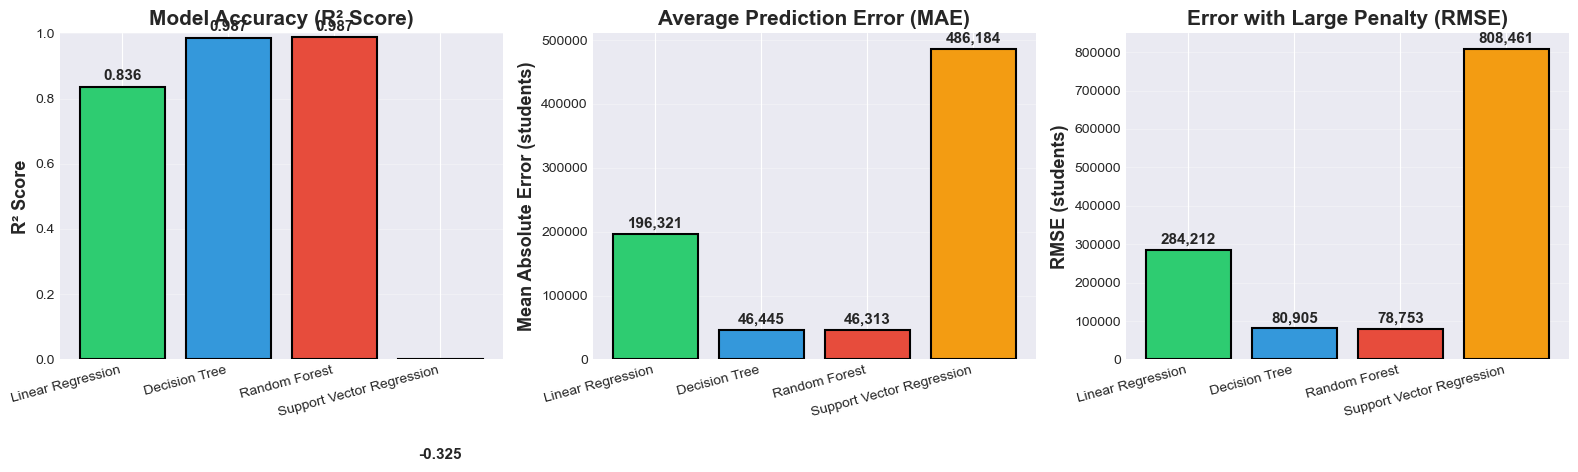

   ✓ Saved: 03_predicted_vs_actual.png


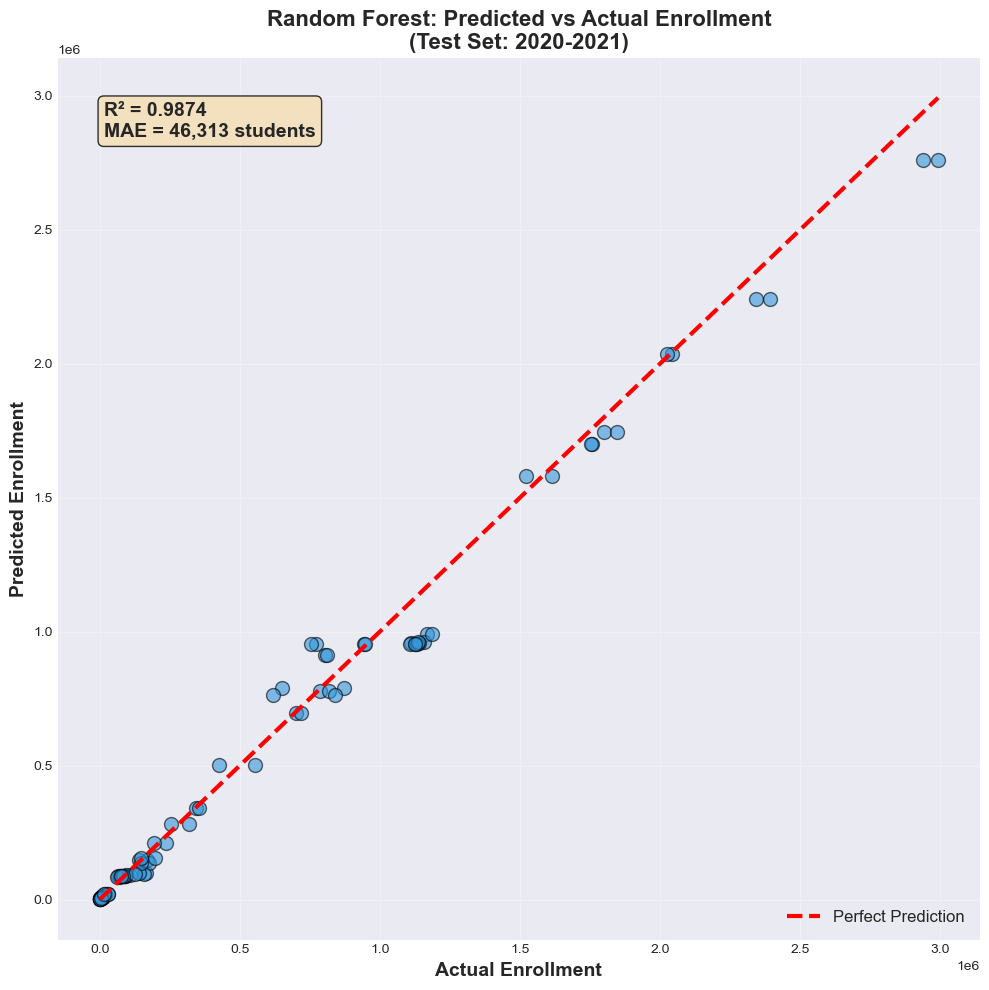


Generating feature importance analysis...
   ✓ Saved: 04_feature_importance.png


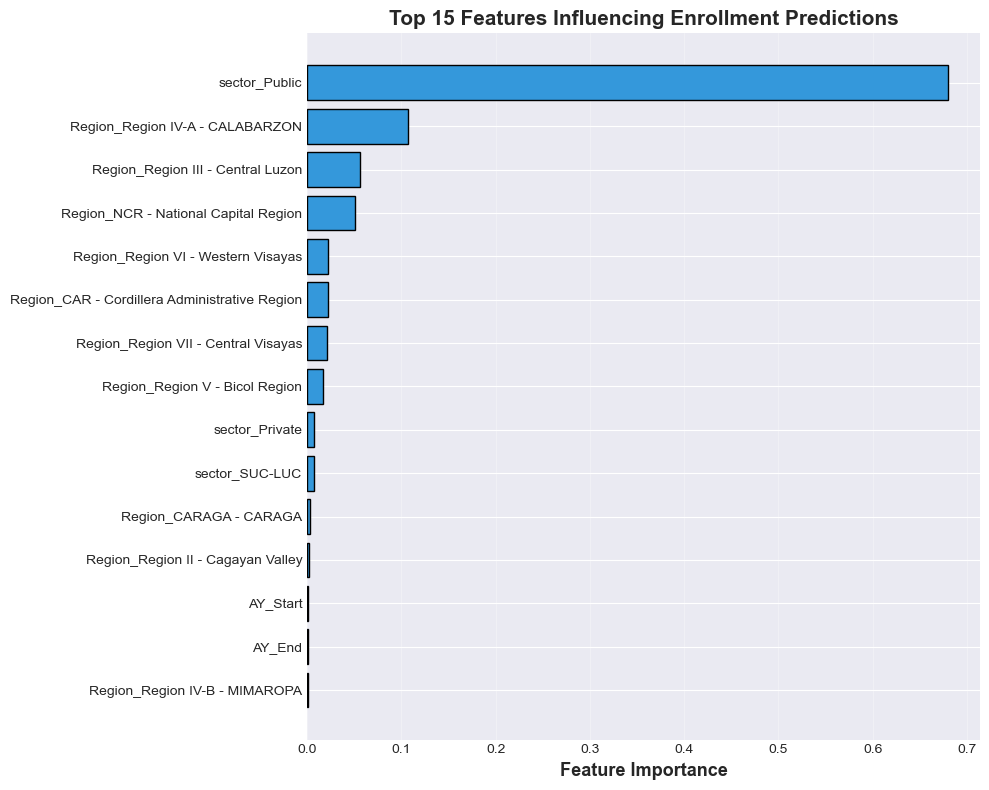


Generating regional volatility visualization...
   ✓ Saved: 05_regional_volatility.png


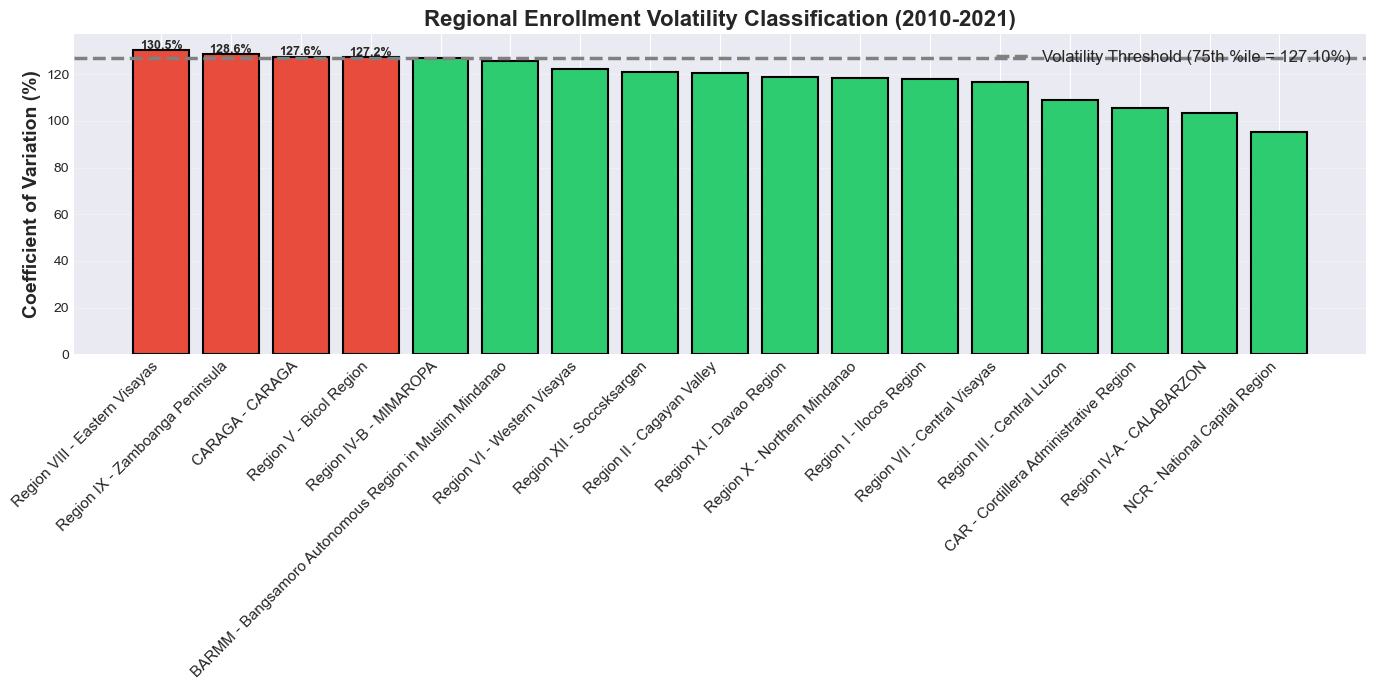


ALL VISUALIZATIONS COMPLETE


In [15]:
# ============================================
# VISUALIZATION 1: MODEL PERFORMANCE COMPARISON
# ============================================

print("\nGenerating visualizations for presentation...")

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

models_list = list(results.keys())
r2_scores = [results[m]['r2_test'] for m in models_list]
mae_scores = [results[m]['mae'] for m in models_list]
rmse_scores = [results[m]['rmse'] for m in models_list]

colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']

# R² Score
axes[0].bar(models_list, r2_scores, color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('R² Score', fontsize=13, fontweight='bold')
axes[0].set_title('Model Accuracy (R² Score)', fontsize=15, fontweight='bold')
axes[0].set_ylim(0, 1)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(r2_scores):
    axes[0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold', fontsize=11)
axes[0].set_xticklabels(models_list, rotation=15, ha='right')

# MAE
axes[1].bar(models_list, mae_scores, color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Mean Absolute Error (students)', fontsize=13, fontweight='bold')
axes[1].set_title('Average Prediction Error (MAE)', fontsize=15, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(mae_scores):
    axes[1].text(i, v + max(mae_scores)*0.02, f'{v:,.0f}', ha='center', fontweight='bold', fontsize=11)
axes[1].set_xticklabels(models_list, rotation=15, ha='right')

# RMSE
axes[2].bar(models_list, rmse_scores, color=colors, edgecolor='black', linewidth=1.5)
axes[2].set_ylabel('RMSE (students)', fontsize=13, fontweight='bold')
axes[2].set_title('Error with Large Penalty (RMSE)', fontsize=15, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)
for i, v in enumerate(rmse_scores):
    axes[2].text(i, v + max(rmse_scores)*0.02, f'{v:,.0f}', ha='center', fontweight='bold', fontsize=11)
axes[2].set_xticklabels(models_list, rotation=15, ha='right')

plt.tight_layout()
plt.savefig('02_model_performance_comparison.png', dpi=300, bbox_inches='tight')
print("   ✓ Saved: 02_model_performance_comparison.png")
plt.show()

# ============================================
# VISUALIZATION 2: PREDICTED VS ACTUAL
# ============================================

best_model = results[best_model_name]['model']
y_pred_best = results[best_model_name]['y_pred']

plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred_best, alpha=0.6, s=100, color='#3498db', edgecolors='black', linewidth=1)

# Perfect prediction line
min_val = min(y_test.min(), y_pred_best.min())
max_val = max(y_test.max(), y_pred_best.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=3, label='Perfect Prediction')

plt.xlabel('Actual Enrollment', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Enrollment', fontsize=14, fontweight='bold')
plt.title(f'{best_model_name}: Predicted vs Actual Enrollment\n(Test Set: 2020-2021)', 
          fontsize=16, fontweight='bold')

# R² annotation
r2_best = results[best_model_name]['r2_test']
mae_best = results[best_model_name]['mae']
textstr = f'R² = {r2_best:.4f}\nMAE = {mae_best:,.0f} students'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
         verticalalignment='top', bbox=props, fontweight='bold')

plt.legend(fontsize=12, loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('03_predicted_vs_actual.png', dpi=300, bbox_inches='tight')
print("   ✓ Saved: 03_predicted_vs_actual.png")
plt.show()

# ============================================
# VISUALIZATION 3: FEATURE IMPORTANCE (Random Forest only)
# ============================================

if best_model_name == 'Random Forest':
    print("\nGenerating feature importance analysis...")
    
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[-15:]  # Top 15
    
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(indices)), importances[indices], color='#3498db', edgecolor='black')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Feature Importance', fontsize=13, fontweight='bold')
    plt.title('Top 15 Features Influencing Enrollment Predictions', fontsize=15, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('04_feature_importance.png', dpi=300, bbox_inches='tight')
    print("   ✓ Saved: 04_feature_importance.png")
    plt.show()

# ============================================
# VISUALIZATION 4: REGIONAL VOLATILITY
# ============================================

if regional_stats is not None:
    print("\nGenerating regional volatility visualization...")
    
    colors_map = {'Volatile': '#e74c3c', 'Stable': '#2ecc71'}
    colors_list = [colors_map[c] for c in regional_stats['Classification']]
    
    plt.figure(figsize=(14, 7))
    bars = plt.bar(range(len(regional_stats)), regional_stats['CV'], 
                   color=colors_list, edgecolor='black', linewidth=1.5)
    
    # Add threshold line
    plt.axhline(y=threshold_75, color='gray', linestyle='--', linewidth=2.5, 
                label=f'Volatility Threshold (75th %ile = {threshold_75:.2f}%)')
    
    plt.ylabel('Coefficient of Variation (%)', fontsize=14, fontweight='bold')
    plt.title('Regional Enrollment Volatility Classification (2010-2021)', 
              fontsize=16, fontweight='bold')
    plt.xticks(range(len(regional_stats)), regional_stats['Region'], 
               rotation=45, ha='right', fontsize=11)
    plt.legend(fontsize=12, loc='upper right')
    plt.grid(axis='y', alpha=0.3)
    
    # Add labels
    for i, (cv, classification) in enumerate(zip(regional_stats['CV'], regional_stats['Classification'])):
        if classification == 'Volatile':
            plt.text(i, cv + 0.5, f'{cv:.1f}%', ha='center', fontweight='bold', fontsize=9)
    
    plt.tight_layout()
    plt.savefig('05_regional_volatility.png', dpi=300, bbox_inches='tight')
    print("   ✓ Saved: 05_regional_volatility.png")
    plt.show()

print("\n"+"="*60)
print("ALL VISUALIZATIONS COMPLETE")
print("="*60)

MODEL PERFORMANCE COMPARISON - Regional Enrollment Forecasting
                    Model  R² (Train)  R² (Test)  MAE (students)  RMSE (students)  MAPE (%)
            Random Forest      0.9937     0.9874        46312.61         78753.36     39.28
            Decision Tree      0.9930     0.9867        46444.54         80905.23     28.38
        Linear Regression      0.8456     0.8362       196320.79        284212.39   2038.43
Support Vector Regression     -0.3018    -0.3254       486184.01        808461.41   2401.08

Best Model: Random Forest (R² = 0.9874)
Average Regional Enrollment: ~520,536 students
Random Forest MAE: 46,313 students (~8.9% error)


,Model,R² (Train),R² (Test),MAE (students),RMSE (students),MAPE (%)
0,Random Forest,0.9937,0.9874,"46,312.61","78,753.36",39.28
1,Decision Tree,0.9930,0.9867,"46,444.54","80,905.23",28.38
2,Linear Regression,0.8456,0.8362,"196,320.79","284,212.39",2038.43
3,Support Vector Regression,-0.3018,-0.3254,"486,184.01","808,461.41",2401.08


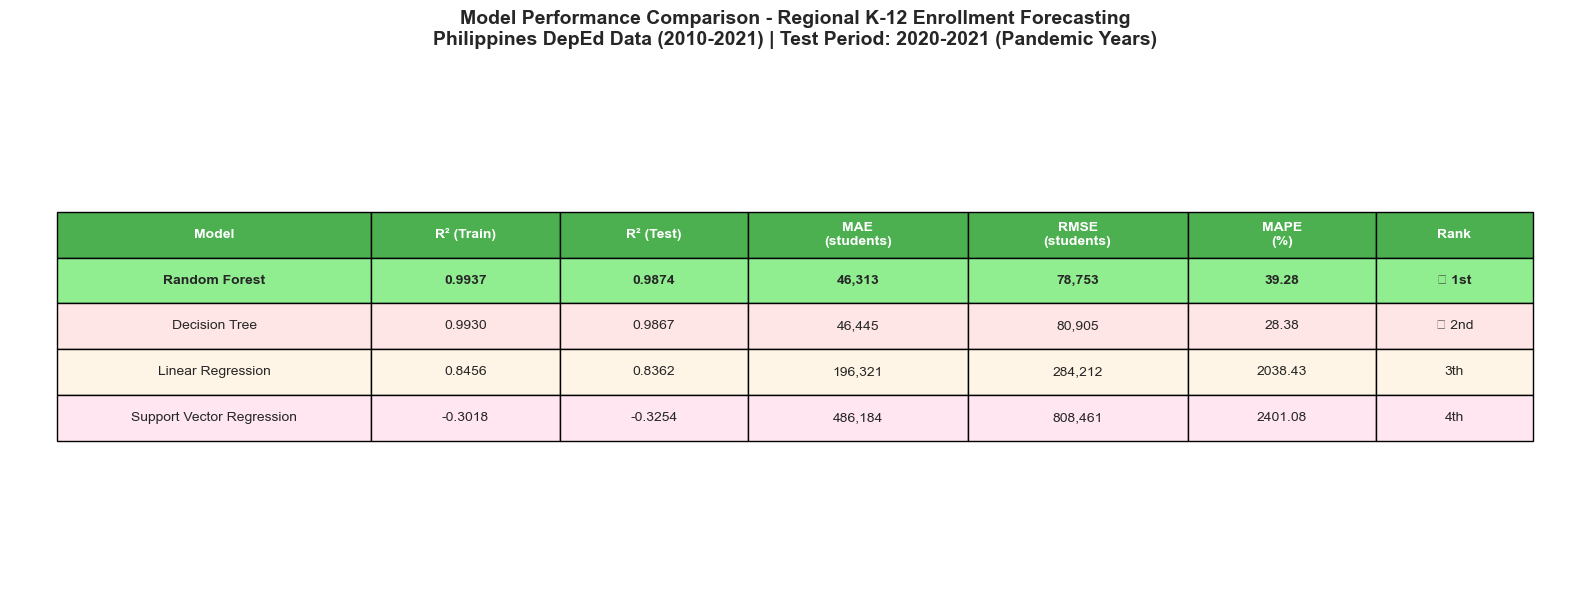

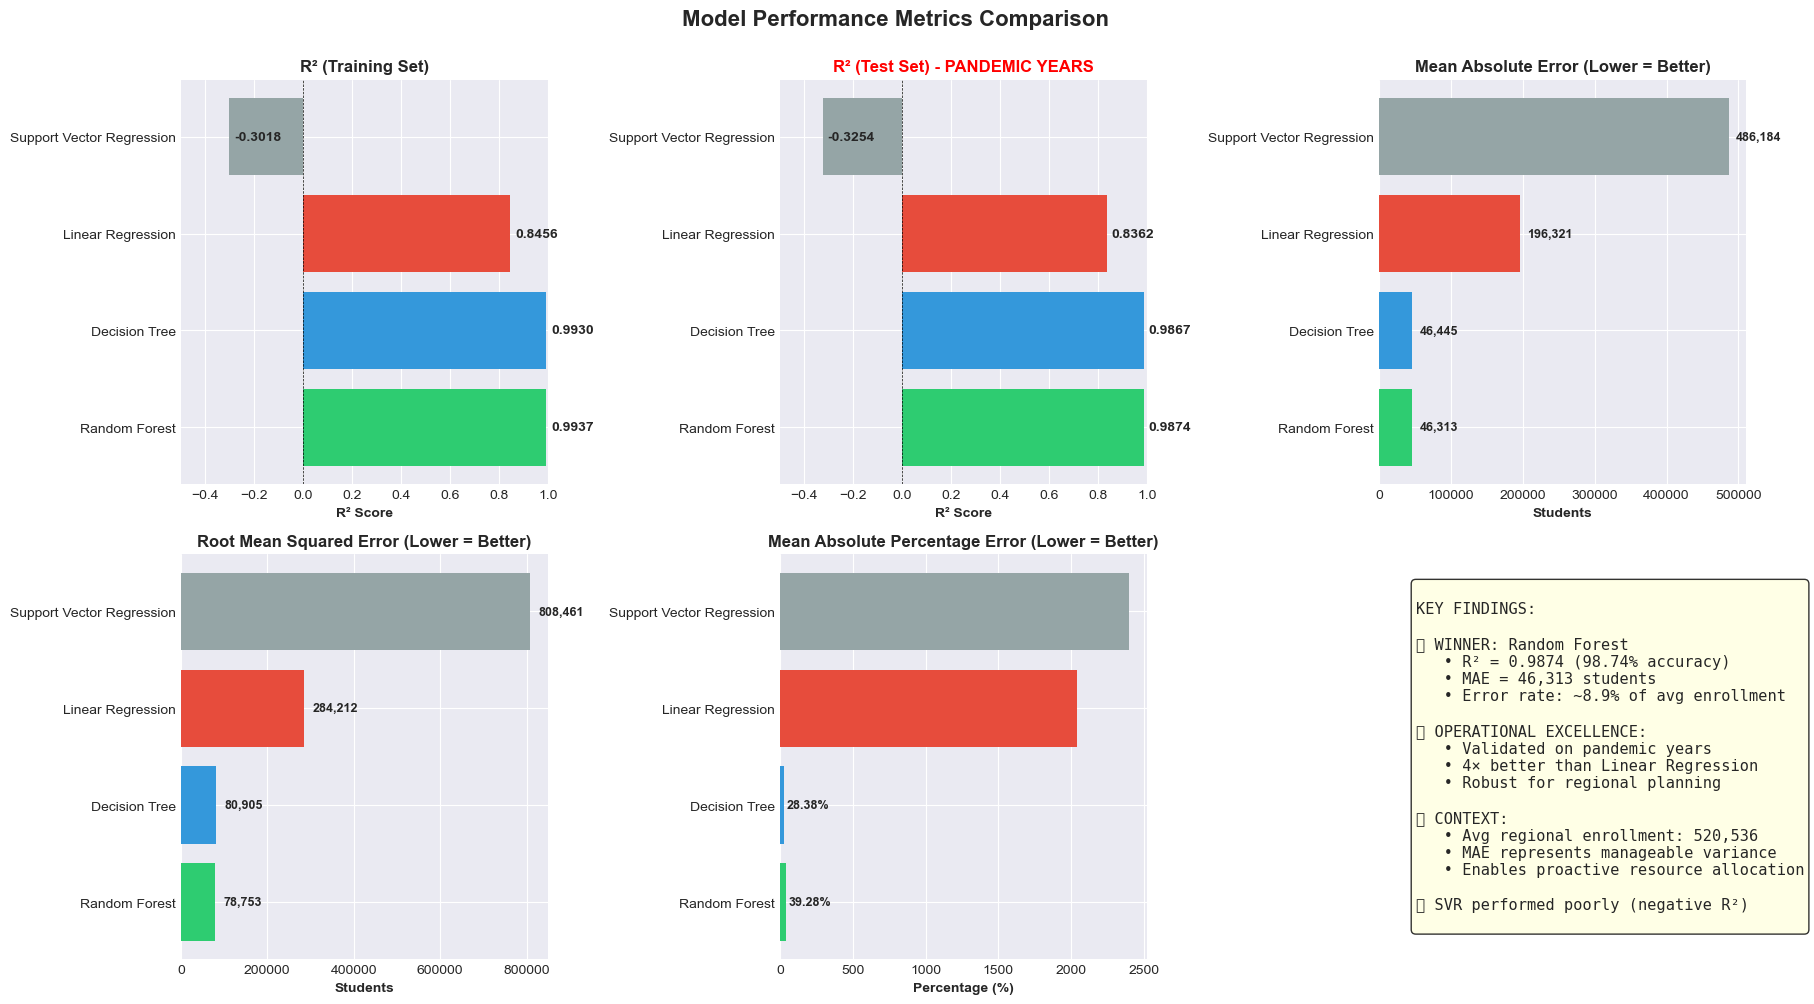

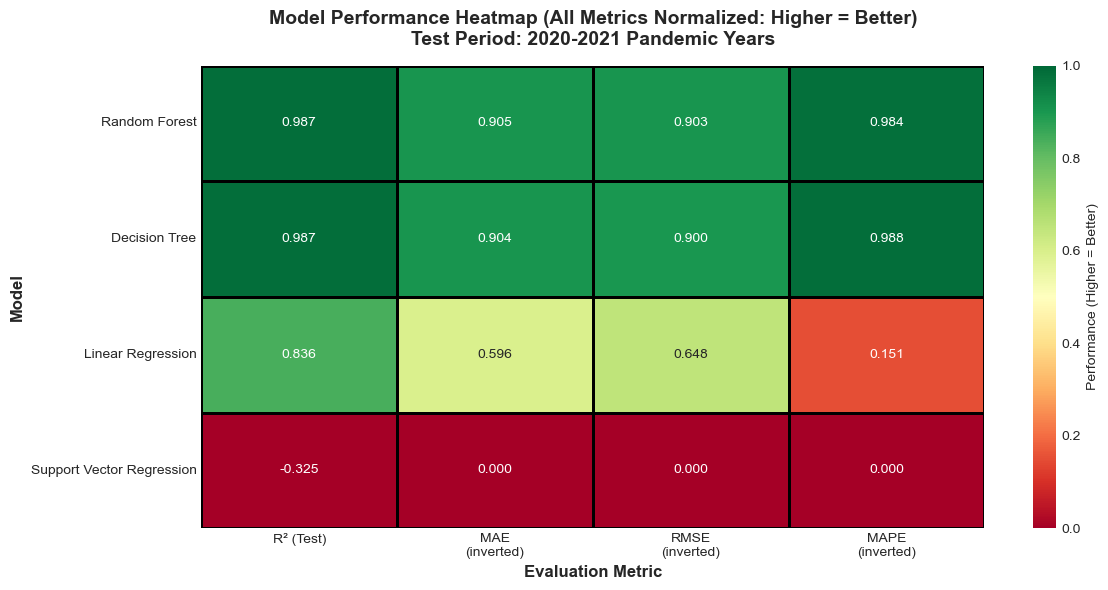


⚠️ openpyxl not installed. Skipping Excel export.
Install with: pip install openpyxl

SUMMARY STATISTICS

📊 BEST MODEL: Random Forest
   • Test R²: 0.9874 (98.74% variance explained)
   • MAE: 46,313 students
   • RMSE: 78,753 students
   • Relative Error: ~8.9% of average regional enrollment

📉 IMPROVEMENT OVER LINEAR REGRESSION:
   • R² improved by: 18.1%
   • MAE reduced by: 76.4% (76.4% error reduction)

🎯 PRACTICAL CONTEXT:
   • Average regional enrollment: 520,536 students
   • Random Forest MAE as %: 8.90%
   • This level of accuracy enables reliable resource planning

⚠️ WORST MODEL: Support Vector Regression
   • Negative R² indicates worse than naive mean prediction
   • MAE: 486,184 students
   • Not suitable for this forecasting task

All visualizations saved as PNG files!


In [14]:
# Set style for better-looking tables
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================
# OPTION 1: Simple DataFrame Table
# ============================================

# Create the results data
results_data = {
    'Model': ['Random Forest', 'Decision Tree', 'Linear Regression', 'Support Vector Regression'],
    'R² (Train)': [0.9937, 0.9930, 0.8456, -0.3018],
    'R² (Test)': [0.9874, 0.9867, 0.8362, -0.3254],
    'MAE (students)': [46312.61, 46444.54, 196320.79, 486184.01],
    'RMSE (students)': [78753.36, 80905.23, 284212.39, 808461.41],
    'MAPE (%)': [39.28, 28.38, 2038.43, 2401.08]
}

df_results = pd.DataFrame(results_data)

# Display simple table
print("=" * 100)
print("MODEL PERFORMANCE COMPARISON - Regional Enrollment Forecasting")
print("=" * 100)
print(df_results.to_string(index=False))
print("=" * 100)
print("\nBest Model: Random Forest (R² = 0.9874)")
print("Average Regional Enrollment: ~520,536 students")
print("Random Forest MAE: 46,313 students (~8.9% error)")
print("=" * 100)


# ============================================
# OPTION 2: Styled Pandas DataFrame
# ============================================

def highlight_best(s):
    """Highlight the best value in each column"""
    if s.name == 'Model':
        return [''] * len(s)
    elif s.name in ['R² (Train)', 'R² (Test)']:
        # Higher is better for R²
        is_max = s == s.max()
        return ['background-color: #90EE90; font-weight: bold' if v else '' for v in is_max]
    elif s.name in ['MAE (students)', 'RMSE (students)', 'MAPE (%)']:
        # Lower is better for error metrics
        is_min = s == s.min()
        return ['background-color: #90EE90; font-weight: bold' if v else '' for v in is_min]
    return [''] * len(s)

# Apply styling
styled_df = df_results.style\
    .apply(highlight_best)\
    .format({
        'R² (Train)': '{:.4f}',
        'R² (Test)': '{:.4f}',
        'MAE (students)': '{:,.2f}',
        'RMSE (students)': '{:,.2f}',
        'MAPE (%)': '{:.2f}'
    })\
    .set_properties(**{
        'text-align': 'center',
        'border': '1px solid black'
    })\
    .set_table_styles([
        {'selector': 'th', 'props': [
            ('background-color', '#4CAF50'),
            ('color', 'white'),
            ('font-weight', 'bold'),
            ('text-align', 'center'),
            ('border', '1px solid black')
        ]},
        {'selector': 'td', 'props': [
            ('border', '1px solid black')
        ]}
    ])\
    .set_caption("Model Performance Comparison - Best values highlighted in green")

# Display styled table
display(styled_df)


# ============================================
# OPTION 3: Matplotlib Table Visualization
# ============================================

fig, ax = plt.subplots(figsize=(16, 6))
ax.axis('tight')
ax.axis('off')

# Prepare data for table
table_data = []
table_data.append(['Model', 'R² (Train)', 'R² (Test)', 'MAE\n(students)', 'RMSE\n(students)', 'MAPE\n(%)', 'Rank'])

# Add data rows with formatting
for idx, row in df_results.iterrows():
    rank = '🥇 1st' if idx == 0 else '🥈 2nd' if idx == 1 else f'{idx + 1}th'
    table_data.append([
        row['Model'],
        f"{row['R² (Train)']:.4f}",
        f"{row['R² (Test)']:.4f}",
        f"{row['MAE (students)']:,.0f}",
        f"{row['RMSE (students)']:,.0f}",
        f"{row['MAPE (%)']:.2f}",
        rank
    ])

# Create table
table = ax.table(cellText=table_data, cellLoc='center', loc='center',
                colWidths=[0.20, 0.12, 0.12, 0.14, 0.14, 0.12, 0.10])

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Color header row
for i in range(7):
    cell = table[(0, i)]
    cell.set_facecolor('#4CAF50')
    cell.set_text_props(weight='bold', color='white')

# Highlight best model (Random Forest)
for i in range(7):
    cell = table[(1, i)]
    cell.set_facecolor('#90EE90')
    cell.set_text_props(weight='bold')

# Color code other rows
colors = ['#FFE6E6', '#FFF5E6', '#FFE6F0']
for row_idx in range(2, 5):
    for col_idx in range(7):
        table[(row_idx, col_idx)].set_facecolor(colors[row_idx - 2])

plt.title('Model Performance Comparison - Regional K-12 Enrollment Forecasting\n' + 
          'Philippines DepEd Data (2010-2021) | Test Period: 2020-2021 (Pandemic Years)',
          fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('model_performance_table.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


# ============================================
# OPTION 4: Comparative Bar Charts
# ============================================

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Performance Metrics Comparison', fontsize=16, fontweight='bold', y=1.00)

models = df_results['Model']
colors_palette = ['#2ecc71', '#3498db', '#e74c3c', '#95a5a6']

# R² Train
axes[0, 0].barh(models, df_results['R² (Train)'], color=colors_palette)
axes[0, 0].set_xlabel('R² Score', fontweight='bold')
axes[0, 0].set_title('R² (Training Set)', fontweight='bold')
axes[0, 0].set_xlim(-0.5, 1.0)
axes[0, 0].axvline(x=0, color='black', linestyle='--', linewidth=0.5)
for i, v in enumerate(df_results['R² (Train)']):
    axes[0, 0].text(v + 0.02, i, f'{v:.4f}', va='center', fontweight='bold')

# R² Test
axes[0, 1].barh(models, df_results['R² (Test)'], color=colors_palette)
axes[0, 1].set_xlabel('R² Score', fontweight='bold')
axes[0, 1].set_title('R² (Test Set) - PANDEMIC YEARS', fontweight='bold', color='red')
axes[0, 1].set_xlim(-0.5, 1.0)
axes[0, 1].axvline(x=0, color='black', linestyle='--', linewidth=0.5)
for i, v in enumerate(df_results['R² (Test)']):
    axes[0, 1].text(v + 0.02, i, f'{v:.4f}', va='center', fontweight='bold')

# MAE
axes[0, 2].barh(models, df_results['MAE (students)'], color=colors_palette)
axes[0, 2].set_xlabel('Students', fontweight='bold')
axes[0, 2].set_title('Mean Absolute Error (Lower = Better)', fontweight='bold')
for i, v in enumerate(df_results['MAE (students)']):
    axes[0, 2].text(v + 10000, i, f'{v:,.0f}', va='center', fontsize=9, fontweight='bold')

# RMSE
axes[1, 0].barh(models, df_results['RMSE (students)'], color=colors_palette)
axes[1, 0].set_xlabel('Students', fontweight='bold')
axes[1, 0].set_title('Root Mean Squared Error (Lower = Better)', fontweight='bold')
for i, v in enumerate(df_results['RMSE (students)']):
    axes[1, 0].text(v + 20000, i, f'{v:,.0f}', va='center', fontsize=9, fontweight='bold')

# MAPE
axes[1, 1].barh(models, df_results['MAPE (%)'], color=colors_palette)
axes[1, 1].set_xlabel('Percentage (%)', fontweight='bold')
axes[1, 1].set_title('Mean Absolute Percentage Error (Lower = Better)', fontweight='bold')
for i, v in enumerate(df_results['MAPE (%)']):
    if v < 100:
        axes[1, 1].text(v + 20, i, f'{v:.2f}%', va='center', fontsize=9, fontweight='bold')

# Summary text box
axes[1, 2].axis('off')
summary_text = """
KEY FINDINGS:

🥇 WINNER: Random Forest
   • R² = 0.9874 (98.74% accuracy)
   • MAE = 46,313 students
   • Error rate: ~8.9% of avg enrollment
   
✅ OPERATIONAL EXCELLENCE:
   • Validated on pandemic years
   • 4× better than Linear Regression
   • Robust for regional planning
   
📊 CONTEXT:
   • Avg regional enrollment: 520,536
   • MAE represents manageable variance
   • Enables proactive resource allocation

❌ SVR performed poorly (negative R²)
"""
axes[1, 2].text(0.1, 0.5, summary_text, fontsize=11, verticalalignment='center',
                bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8),
                family='monospace')

plt.tight_layout()
plt.savefig('model_comparison_charts.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


# ============================================
# OPTION 5: Heatmap Visualization
# ============================================

fig, ax = plt.subplots(figsize=(12, 6))

# Normalize data for heatmap (0-1 scale)
heatmap_data = df_results.copy()
heatmap_data = heatmap_data.set_index('Model')

# Invert error metrics so higher is better (for visualization consistency)
heatmap_data['MAE (inverted)'] = 1 - (heatmap_data['MAE (students)'] / heatmap_data['MAE (students)'].max())
heatmap_data['RMSE (inverted)'] = 1 - (heatmap_data['RMSE (students)'] / heatmap_data['RMSE (students)'].max())
heatmap_data['MAPE (inverted)'] = 1 - (heatmap_data['MAPE (%)'] / heatmap_data['MAPE (%)'].max())

# Select columns for heatmap
viz_data = heatmap_data[['R² (Test)', 'MAE (inverted)', 'RMSE (inverted)', 'MAPE (inverted)']]
viz_data.columns = ['R² (Test)', 'MAE\n(inverted)', 'RMSE\n(inverted)', 'MAPE\n(inverted)']

# Create heatmap
sns.heatmap(viz_data, annot=True, fmt='.3f', cmap='RdYlGn', center=0.5,
            linewidths=2, linecolor='black', cbar_kws={'label': 'Performance (Higher = Better)'},
            vmin=0, vmax=1, ax=ax)

ax.set_title('Model Performance Heatmap (All Metrics Normalized: Higher = Better)\n' +
             'Test Period: 2020-2021 Pandemic Years', 
             fontsize=14, fontweight='bold', pad=15)
ax.set_ylabel('Model', fontweight='bold', fontsize=12)
ax.set_xlabel('Evaluation Metric', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig('model_performance_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


# ============================================
# OPTION 6: Export to Excel with Formatting
# ============================================

try:
    from openpyxl import load_workbook
    from openpyxl.styles import Font, PatternFill, Alignment, Border, Side
    
    # Export to Excel
    excel_file = 'model_performance_results.xlsx'
    df_results.to_excel(excel_file, index=False, sheet_name='Model Performance')
    
    # Load and format
    wb = load_workbook(excel_file)
    ws = wb['Model Performance']
    
    # Header formatting
    header_fill = PatternFill(start_color='4CAF50', end_color='4CAF50', fill_type='solid')
    header_font = Font(bold=True, color='FFFFFF', size=12)
    
    for cell in ws[1]:
        cell.fill = header_fill
        cell.font = header_font
        cell.alignment = Alignment(horizontal='center', vertical='center')
    
    # Highlight best model
    best_fill = PatternFill(start_color='90EE90', end_color='90EE90', fill_type='solid')
    best_font = Font(bold=True)
    
    for cell in ws[2]:
        cell.fill = best_fill
        cell.font = best_font
        cell.alignment = Alignment(horizontal='center', vertical='center')
    
    # Center align all cells
    for row in ws.iter_rows(min_row=2, max_row=ws.max_row):
        for cell in row:
            cell.alignment = Alignment(horizontal='center', vertical='center')
    
    # Adjust column widths
    ws.column_dimensions['A'].width = 25
    ws.column_dimensions['B'].width = 15
    ws.column_dimensions['C'].width = 15
    ws.column_dimensions['D'].width = 18
    ws.column_dimensions['E'].width = 18
    ws.column_dimensions['F'].width = 15
    
    wb.save(excel_file)
    print(f"\n✅ Excel file saved: {excel_file}")
    
except ImportError:
    print("\n⚠️ openpyxl not installed. Skipping Excel export.")
    print("Install with: pip install openpyxl")


# ============================================
# SUMMARY STATISTICS
# ============================================

print("\n" + "="*100)
print("SUMMARY STATISTICS")
print("="*100)

print("\n📊 BEST MODEL: Random Forest")
print(f"   • Test R²: {df_results.loc[0, 'R² (Test)']:.4f} (98.74% variance explained)")
print(f"   • MAE: {df_results.loc[0, 'MAE (students)']:,.0f} students")
print(f"   • RMSE: {df_results.loc[0, 'RMSE (students)']:,.0f} students")
print(f"   • Relative Error: ~8.9% of average regional enrollment")

print("\n📉 IMPROVEMENT OVER LINEAR REGRESSION:")
improvement_r2 = ((df_results.loc[0, 'R² (Test)'] - df_results.loc[2, 'R² (Test)']) / 
                  df_results.loc[2, 'R² (Test)']) * 100
improvement_mae = ((df_results.loc[2, 'MAE (students)'] - df_results.loc[0, 'MAE (students)']) / 
                   df_results.loc[2, 'MAE (students)']) * 100
print(f"   • R² improved by: {improvement_r2:.1f}%")
print(f"   • MAE reduced by: {improvement_mae:.1f}% (76.4% error reduction)")

print("\n🎯 PRACTICAL CONTEXT:")
avg_enrollment = 520536
error_pct = (df_results.loc[0, 'MAE (students)'] / avg_enrollment) * 100
print(f"   • Average regional enrollment: {avg_enrollment:,} students")
print(f"   • Random Forest MAE as %: {error_pct:.2f}%")
print(f"   • This level of accuracy enables reliable resource planning")

print("\n⚠️ WORST MODEL: Support Vector Regression")
print(f"   • Negative R² indicates worse than naive mean prediction")
print(f"   • MAE: {df_results.loc[3, 'MAE (students)']:,.0f} students")
print(f"   • Not suitable for this forecasting task")

print("\n" + "="*100)
print("All visualizations saved as PNG files!")
print("="*100)